Observation 1:  There is a definite peak in the curve created by the data points at the equator.

Observation 2:  On the day that the data was collected, the equator also has the capacity to experience more humidity, which warmer air does have a greater capacity to hold moisture.

Observation 3:  Cloudiness and windspeed show no correlation to the latitude.

In [31]:
import requests
import random
import pandas as pd
import numpy as np
import json
import requests
from citipy import citipy
import openweathermapy as owm
import matplotlib.pyplot as plt
import datetime

from config import api_key

In [2]:
# Generate random numbers to be used for coordinates

number_lat = np.random.uniform(-90,90,600)
number_lon = np.random.uniform(0,180,600)

number_lat = np.array(number_lat).tolist()
number_lon = np.array(number_lon).tolist()

In [3]:
# Change values to correct order of magnitued

lat_lon = zip(number_lat,number_lon)
lat_lon

In [4]:
# Generate city list

cities = []

for coord in lat_lon:
    lat, lon = coord
    cities.append(citipy.nearest_city(lat,lon))


In [5]:
city_name=[]
country_code = []

for city in cities:
    city_name.append(city.city_name)
    country_code.append(city.country_code)
    
city_country = zip(city_name, country_code)
city_country

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"

name = []
code = []
cloudiness=[]
date = []
humidity = []
city_lat = []
city_lon = []
max_temp = []
wind_speed = []
city_number = 0

for city in city_country:
    city_t, country_t = city
    query_url = url + "appid=" + api_key + "&q=" + city_t + "," + country_t
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    try:
        coord = weather_json["coord"]
    except:
        continue
    
    clouds = weather_json.get("clouds","")
    main = weather_json.get("main","")
    sys = weather_json.get("sys","")
    wind = weather_json.get("wind","")
    
    city_number += 1
    
    name.append(weather_json.get("name",""))
    code.append(sys.get("country",""))
    city_lat.append(coord.get("lat",""))
    city_lon.append(coord.get("lon",""))
    date.append(weather_json.get("dt",""))
    cloudiness.append(clouds.get("all",""))
    humidity.append(main.get("humidity",""))
    max_temp.append(main.get("temp_max",""))
    wind_speed.append(wind.get("speed",""))
    
    print(f'{city_number} | {city_t}')
    print(f'{query_url}')

1 | namibe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=namibe,ao
2 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ostrovnoy,ru
3 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bredasdorp,za
4 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=chokurdakh,ru
5 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=chokurdakh,ru
6 | bluff
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bluff,nz
7 | guangyuan
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=guangyuan,cn
8 | varna
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=varna,ru
9 | salalah
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9e

74 | kokopo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kokopo,pg
75 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=longyearbyen,sj
76 | dikson
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=dikson,ru
77 | port alfred
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=port alfred,za
78 | bluff
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bluff,nz
79 | mount gambier
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mount gambier,au
80 | kawalu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kawalu,id
81 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hobart,au
82 | marawi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece

146 | omaruru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=omaruru,na
147 | krasnomayskiy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=krasnomayskiy,ru
148 | umm kaddadah
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=umm kaddadah,sd
149 | carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=carnarvon,au
150 | mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mahebourg,mu
151 | monywa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=monywa,mm
152 | bela
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bela,pk
153 | bulgan
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bulgan,mn
154 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=25

220 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hithadhoo,mv
221 | pevek
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=pevek,ru
222 | cape town
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cape town,za
223 | belaya gora
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=belaya gora,ru
224 | hwange
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hwange,zw
225 | inhambane
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=inhambane,mz
226 | kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kaitangata,nz
227 | pevek
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=pevek,ru
228 | plettenberg bay
http://api.openweathermap.org/data/2.5/weather?appid=25bc9

291 | mao
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mao,td
292 | ustye
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ustye,ru
293 | bluff
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bluff,nz
294 | bosaso
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bosaso,so
295 | karaidel
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=karaidel,ru
296 | kjollefjord
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kjollefjord,no
297 | atri
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=atri,it
298 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=saint-philippe,re
299 | walvis bay
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b

363 | ierapetra
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ierapetra,gr
364 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=busselton,au
365 | yulara
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=yulara,au
366 | karratha
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=karratha,au
367 | ludza
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ludza,lv
368 | tazovskiy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tazovskiy,ru
369 | albany
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=albany,au
370 | tiksi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tiksi,ru
371 | nelson bay
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc

435 | sampit
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sampit,id
436 | ahipara
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ahipara,nz
437 | aku
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=aku,ng
438 | marostica
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=marostica,it
439 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=saint-philippe,re
440 | khatanga
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=khatanga,ru
441 | iranshahr
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=iranshahr,ir
442 | volchikha
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=volchikha,ru
443 | tiksi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6

507 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hithadhoo,mv
508 | saldanha
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=saldanha,za
509 | east london
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=east london,za
510 | dikson
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=dikson,ru
511 | cesvaine
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cesvaine,lv
512 | hermanus
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hermanus,za
513 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=busselton,au
514 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=saskylakh,ru
515 | naifaru
http://api.openweathermap.org/data/2.5/weather?appid=25bc9

In [40]:
max_temp_c = [k-273.15 for k in max_temp]
date_query = date[0]
query_date = datetime.datetime.fromtimestamp(date_query).strftime('%Y-%m-%d %H:%M:%S')

In [41]:
summary_df = pd.DataFrame({"City": name,
                          "Country": code,
                          "Latitude": city_lat,
                          "Longitude": city_lon,
                          "Max Temp": max_temp_c,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed": wind_speed})
summary_df = summary_df[["City","Country","Latitude","Longitude","Max Temp","Humidity","Cloudiness", "Wind Speed"]]
print(f'number of cities: {len(name)}')
summary_df.head()

number of cities: 517


,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,Namibe,AO,-15.19,12.15,25.923,100,0,5.71
1,Ostrovnoy,RU,68.05,39.51,-11.852,78,0,1.29
2,Bredasdorp,ZA,-34.53,20.04,17.000,72,0,5.70
3,Chokurdakh,RU,70.62,147.90,-10.327,77,76,1.36
4,Chokurdakh,RU,70.62,147.90,-10.327,77,76,1.36


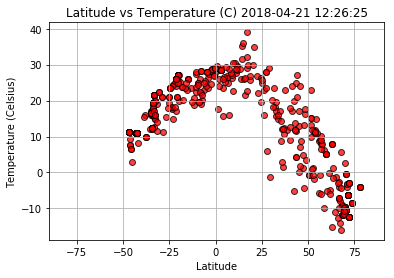

In [42]:
# Temperature vs. Latitude
plt.scatter(city_lat, max_temp_c, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.xlim(-90,91)

plt.title(f"Latitude vs Temperature (C) {query_date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")

plt.grid()

plt.savefig("Temp_v_Lat.png")
plt.show()

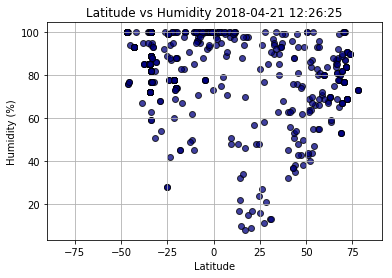

In [43]:
# Humidity vs. Latitude
plt.scatter(city_lat, humidity, marker="o", facecolors="navy", edgecolors="black", alpha=0.75)

plt.xlim(-90,91)

plt.title(f"Latitude vs Humidity {query_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid()

plt.savefig("Humidity_v_Lat.png")
plt.show()

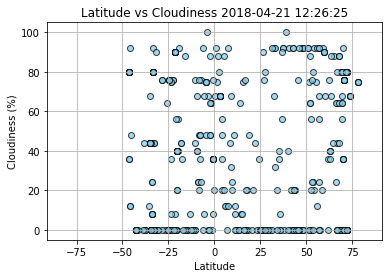

In [44]:
# Cloudiness vs. Latitude
plt.scatter(city_lat, cloudiness, marker="o", facecolors="skyblue", edgecolors="black", alpha=0.75)

plt.xlim(-91,91)

plt.title(f"Latitude vs Cloudiness {query_date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid()

plt.savefig("Cloudiness_v_Lat.png")
plt.show()

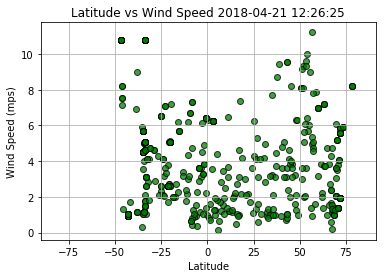

In [45]:
# Wind Speed vs. Latitude
plt.scatter(city_lat, wind_speed, marker="o", facecolors="green", edgecolors="black", alpha=0.75)

plt.xlim(-90,91)

plt.title(f"Latitude vs Wind Speed {query_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mps)")

plt.grid()

plt.savefig("WindSpeed_v_Lat.png")
plt.show()

In [46]:
summary_df.to_csv("DataSummary.csv", index=False, header=True)